In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv
/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Importing Required Libraries </div> 

In [2]:
# Libray for Data Manipulation.
import pandas as pd
import numpy as np

#Library for Data Visualization.
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Loading Dataset </div> 

In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
Submission_df = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
main_df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [6]:
main_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Data Wrangling </div> 

#### 1. Computing Dimension of Datasetm

In [7]:
print("Main dataset shape: ",main_df.shape)
print("Train dataset shape: ",train_df.shape)
print("Test dataset shape: ",test_df.shape)

Main dataset shape:  (10002, 14)
Train dataset shape:  (165034, 14)
Test dataset shape:  (110023, 13)


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There is total **165034 records** and **14 columns** availabe in the train dataset.

#### 2. Statistical Summary of Dataset

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


#### 3. Dropping Attritbutes which doesn't imply any meaningful insights in our analysis.

In [10]:
cols = ["id", "CustomerId", "Surname"]
train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)
main_df.drop(['RowNumber',"CustomerId", "Surname"],axis = 1,inplace = True)

#### 4. Merging Two dataset

In [11]:
print(main_df.shape, train_df.shape)
train_df = pd.concat([train_df, main_df], axis = 0)
train_df.shape

(10002, 11) (165034, 11)


(175036, 11)

In [12]:
test_df.shape

(110023, 10)

In [13]:
# Identify the data types of columns
column_data_types = train_df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in Train dataset")
print(f"There are {categorical_count} Categorical Columns in Train dataset")

There are 9 Numerical Columns in Train dataset
There are 2 Categorical Columns in Train dataset


#### 5. Random Sample of dataset with only Numerical Feature 

In [14]:
train_df.select_dtypes(np.number).sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
147243,558,33.0,2,0.00,1,1.0,0.0,706.50,0
16148,639,34.0,4,0.00,2,1.0,0.0,133086.35,0
94747,686,31.0,7,0.00,2,1.0,1.0,120830.82,0
124838,706,29.0,9,117056.46,1,0.0,1.0,93336.93,0
157876,733,38.0,3,0.00,3,1.0,0.0,170967.98,1


#### 6. Random Sample of dataset with only categorical Feature

In [15]:
train_df.select_dtypes(include='O').sample(5)

,Geography,Gender
133578,France,Male
135243,France,Female
105021,Germany,Male
83215,Germany,Male
51760,France,Male


#### 7. Checking if There's Any Duplicate Records.

In [16]:
print("Duplicates in Train Dataset: ",train_df.duplicated().sum())

Duplicates in Train Dataset:  571


In [17]:
print("Duplicates in Test Dataset: ",test_df.duplicated().sum())

Duplicates in Test Dataset:  72


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There are 571 duplicate records present in the Train dataset and 72 duplicate records present in the Test Dataset.


In [18]:
#Dropping Duplicates 
train_df = train_df.drop_duplicates()

#### 8. Computing Total No. of Missing Values and the Percentage of Missing Values

In [19]:
print("Checking Null Values in Train Dataset")
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

Checking Null Values in Train Dataset


,Total No. of Missing Values,% of Missing Values
CreditScore,0,0.0
Geography,1,0.0
Gender,0,0.0
Age,1,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0
HasCrCard,1,0.0
IsActiveMember,1,0.0
EstimatedSalary,0,0.0


In [20]:
train_df = train_df.dropna()

In [21]:
print("Checking Null Values in Test Dataset")
missing_data = test_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(test_df))*100,2)
missing_data

Checking Null Values in Test Dataset


,Total No. of Missing Values,% of Missing Values
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0
HasCrCard,0,0.0
IsActiveMember,0,0.0
EstimatedSalary,0,0.0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Train dataset have very less number of missing values so we just drop it
* None of the Attribute are having Missing Values in test dataset.  

#### 9. Performing Descriptive Analysis

In [22]:
round(train_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,174461.0,656.12,81.11,350.00,597.00,659.00,710.00,850.00
Age,174461.0,38.17,8.97,18.00,32.00,37.00,42.00,92.00
Tenure,174461.0,5.02,2.81,0.00,3.00,5.00,7.00,10.00
Balance,174461.0,56639.16,62978.19,0.00,0.00,0.00,120723.17,250898.09
NumOfProducts,174461.0,1.55,0.55,1.00,1.00,2.00,2.00,4.00
HasCrCard,174461.0,0.75,0.43,0.00,1.00,1.00,1.00,1.00
IsActiveMember,174461.0,0.50,0.50,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,174461.0,111891.04,50792.48,11.58,73322.68,116971.05,154767.34,199992.48
Exited,174461.0,0.21,0.41,0.00,0.00,0.00,0.00,1.00


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The Minimum Age is 18 which conveys that All customers are Adult.


#### 10. Performing Descriptive Analysis on Categorical Attributes.

In [23]:
train_df.describe(include="O").T

,count,unique,top,freq
Geography,174461,3,France,98893
Gender,174461,2,Male,98266


#### 11. Checking Unique Values of Categorical Attributes.

In [24]:
cat_cols = train_df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(train_df[column]))
    print("-"*140)

Unique values of  Geography {'France', 'Germany', 'Spain'}
--------------------------------------------------------------------------------------------------------------------------------------------
Unique values of  Gender {'Male', 'Female'}
--------------------------------------------------------------------------------------------------------------------------------------------


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Exploratory Data Analysis (EDA) </div> 

#### 1. Visualizing the Employee Attrition Rate

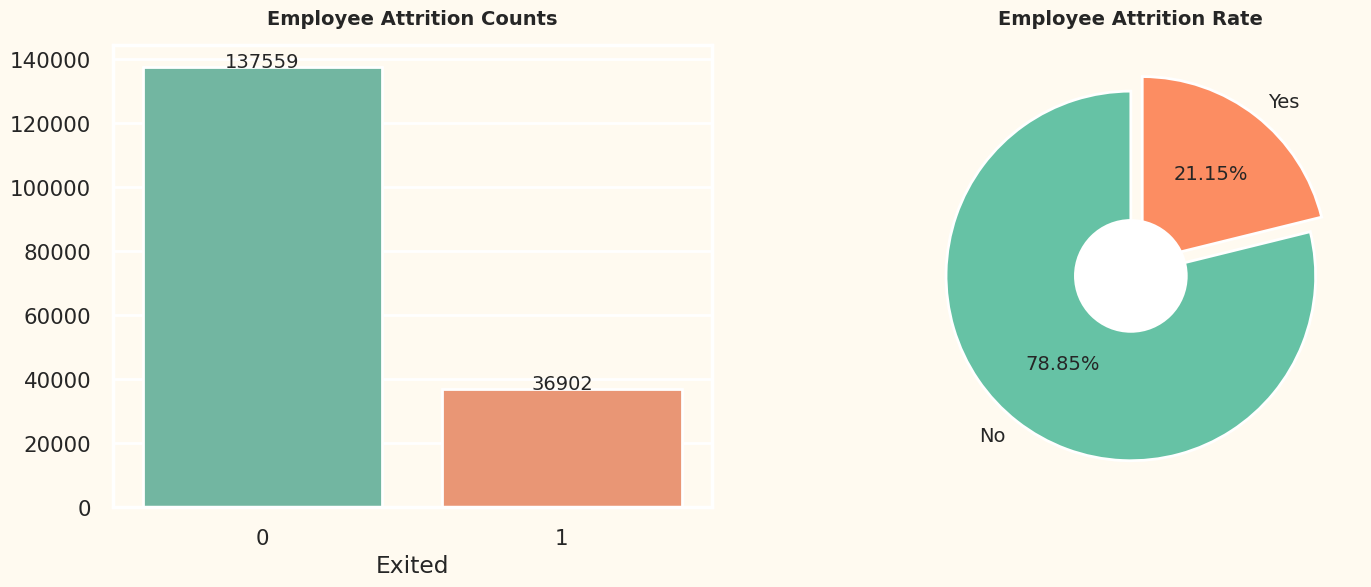

In [25]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = train_df["Exited"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The customers Attrition rate of this organization is 21.15%. 
* The data is unbalanced. 

In [26]:
def pie_bar_plot(df, col, attrition_col):
    plt.figure(figsize=(14, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    
    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')
    
    value_1 = value_counts
    value_2 = df[df['attrition_label'] == 'Yes'][col].value_counts().sort_index()
    
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

# Example usage:
# pie_bar_plot(your_dataframe, 'some_column', 'attrition'

#### 2. Analyzing Employee Attrition by Gender.

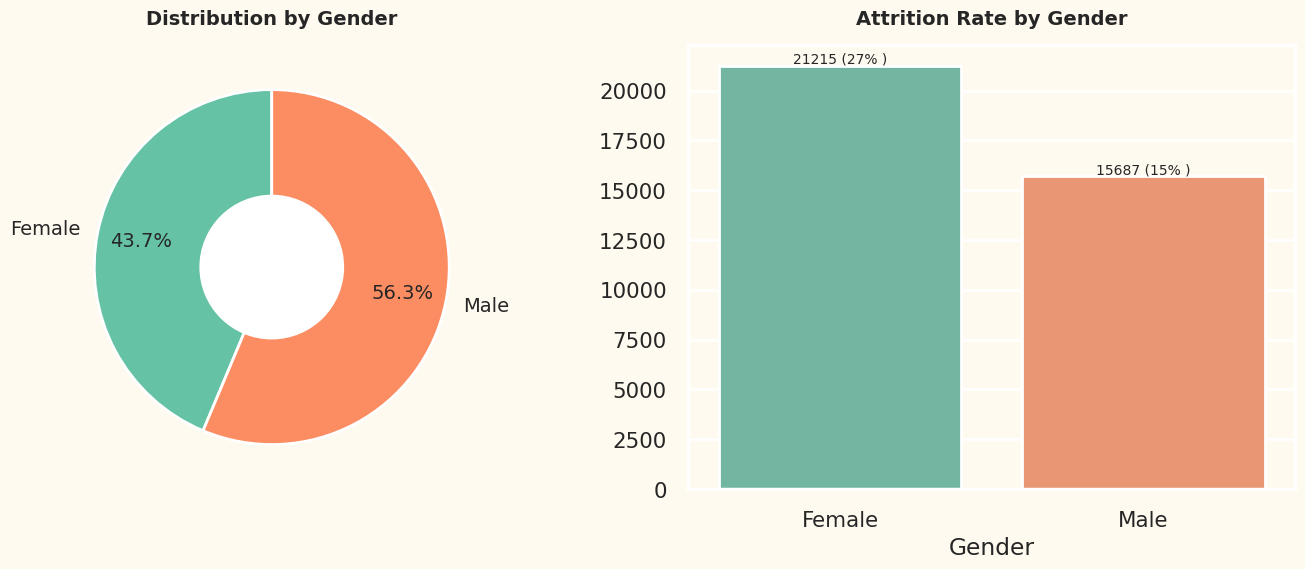

In [27]:
pie_bar_plot(train_df, 'Gender', 'Exited')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Male customers accounts for a higher proportion than female customers by more than 12.6%.  
* Attrition in female customers is higher compared to male customers.

#### 3. Analyzing Employee Attrition by Geography

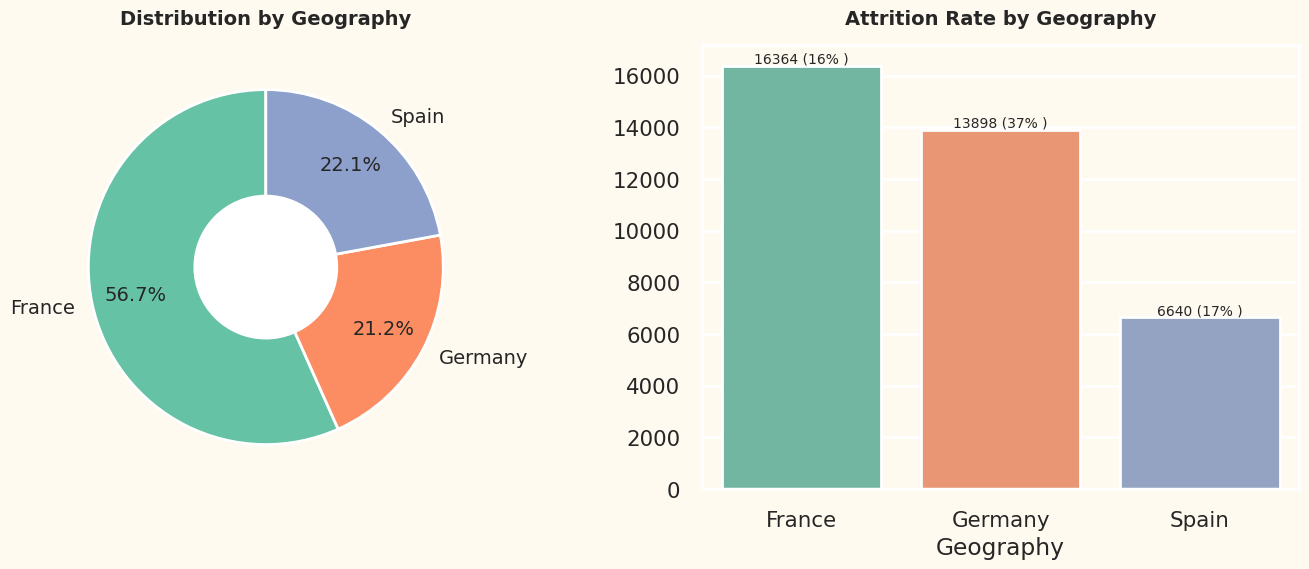

In [28]:
pie_bar_plot(train_df, 'Geography', 'Exited')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the customers are from France i.e 56.7 % .  
* The attrition rate is very high of customers who are from Germany.  
* The attrition rate is low for customers who are from France.

In [29]:
def hist_with_hue(df, col, attrition_col):
    plt.figure(figsize=(13.5, 6))
    
    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')
    
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue='attrition_label', data=df, kde=True, palette='Set2')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='attrition_label', y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {attrition_col}", fontweight="black", size=14, pad=10)
    
    plt.tight_layout()
    plt.show()


#### 4. Employee Distribution by Age

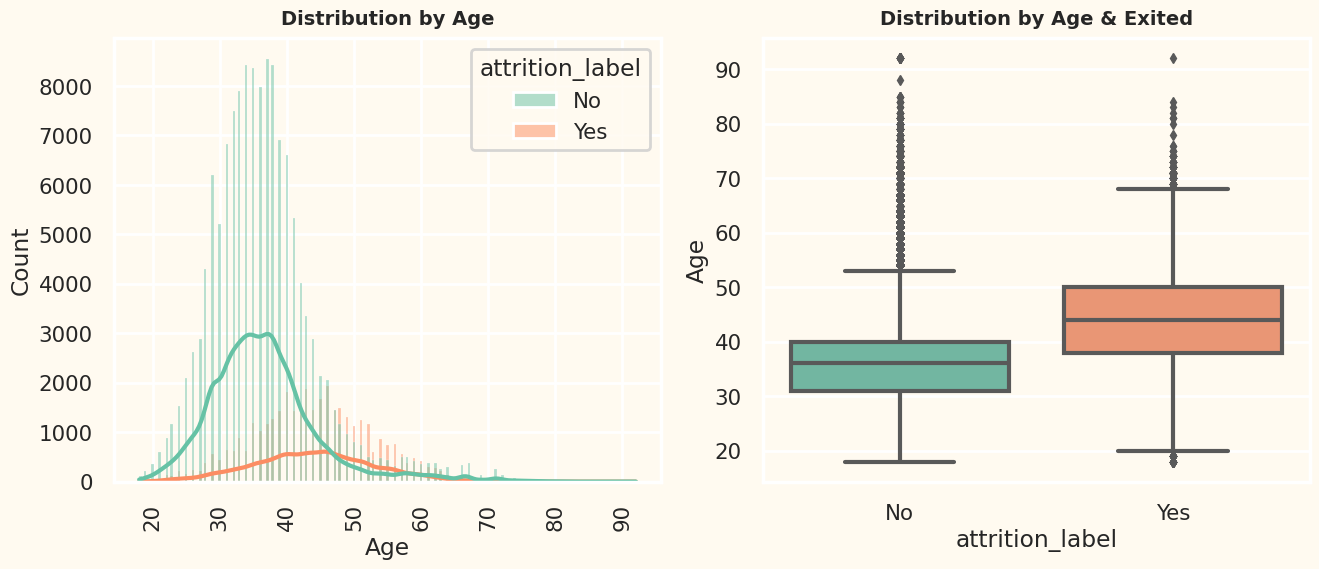

In [30]:
hist_with_hue(train_df, 'Age', 'Exited')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the customers are between age 30 to 40.      
* We can clearly observe a trend that as the age is increasing the attrition is increasing.    
* The medain age of customers who left the organization is more than the customers who are working.    
* Customers with elder age leaves the company more compared to young employees. 

In [31]:
def count_percent_plot(df, col, attrition_col):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df['attrition_label'] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


#### 5. Analyzing Employee Attrition by Credit Score

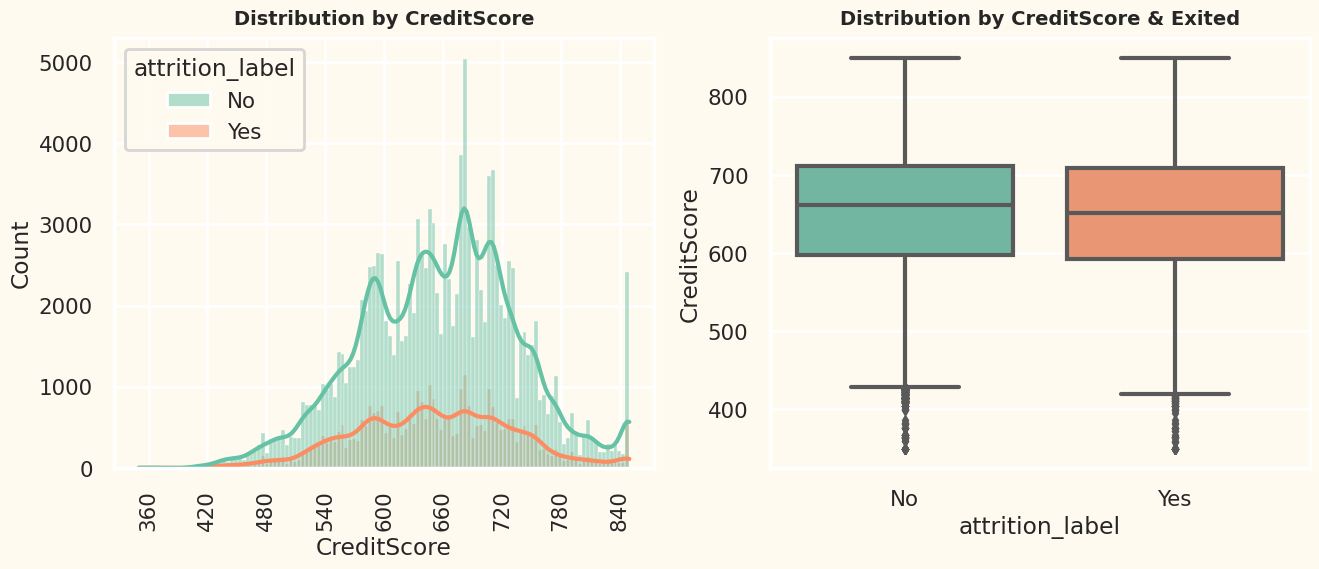

In [32]:
hist_with_hue(train_df, 'CreditScore', 'Exited')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Most of the customer's Credit Score are between 600 to 700.      
* No meaningfull information for attrition is seen here

#### 6. Analyzing Employee Attrition by Tenure

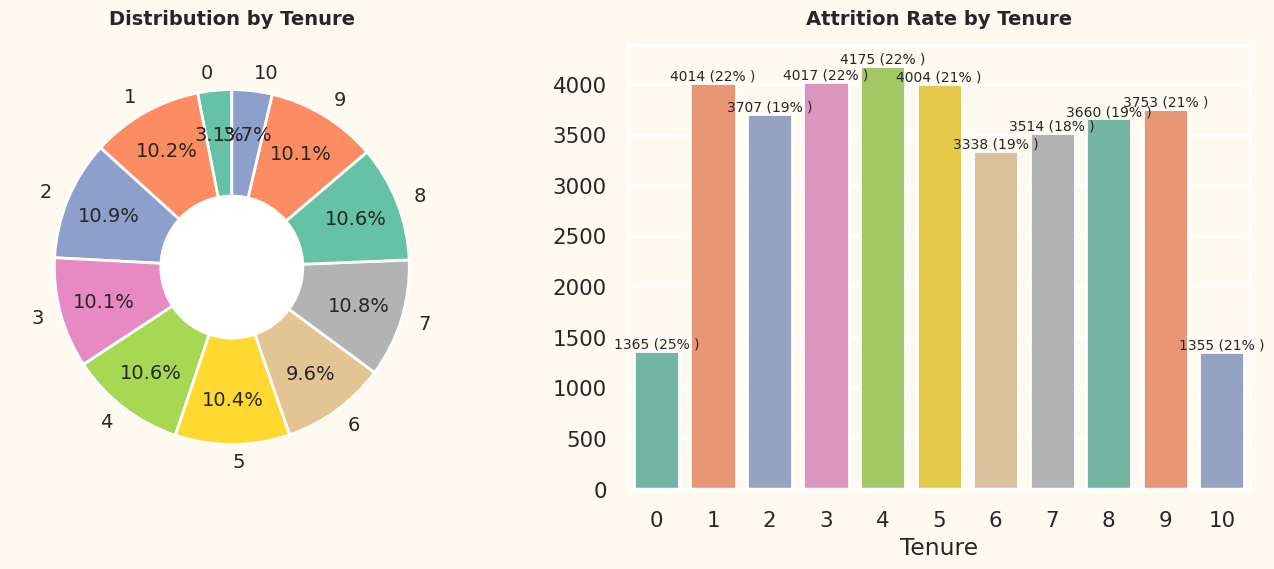

In [33]:
pie_bar_plot(train_df, 'Tenure', 'Exited')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>
    
* Attrition rate is almost same in every tenure category i.e in between (19-22 %) except 0 tenure i.e highest 25%.

#### 7. Analyzing Employee Attrition by Balance

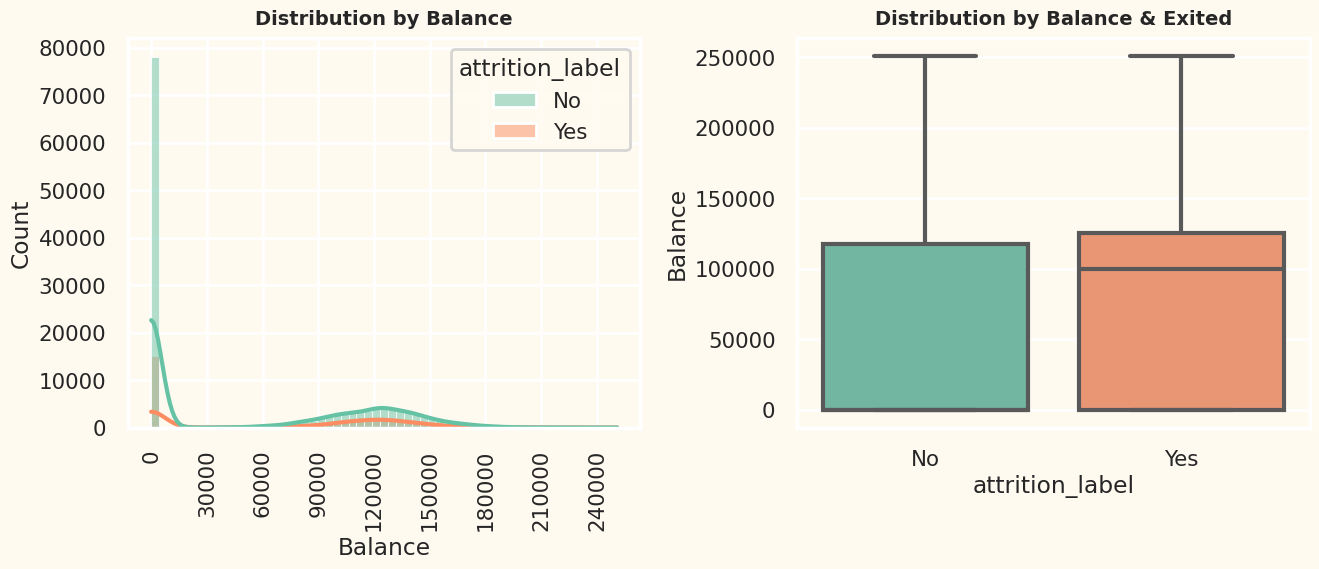

In [34]:
hist_with_hue(train_df, 'Balance', 'Exited')

#### 8. Analyzing Employee Attrition by NumOfProducts

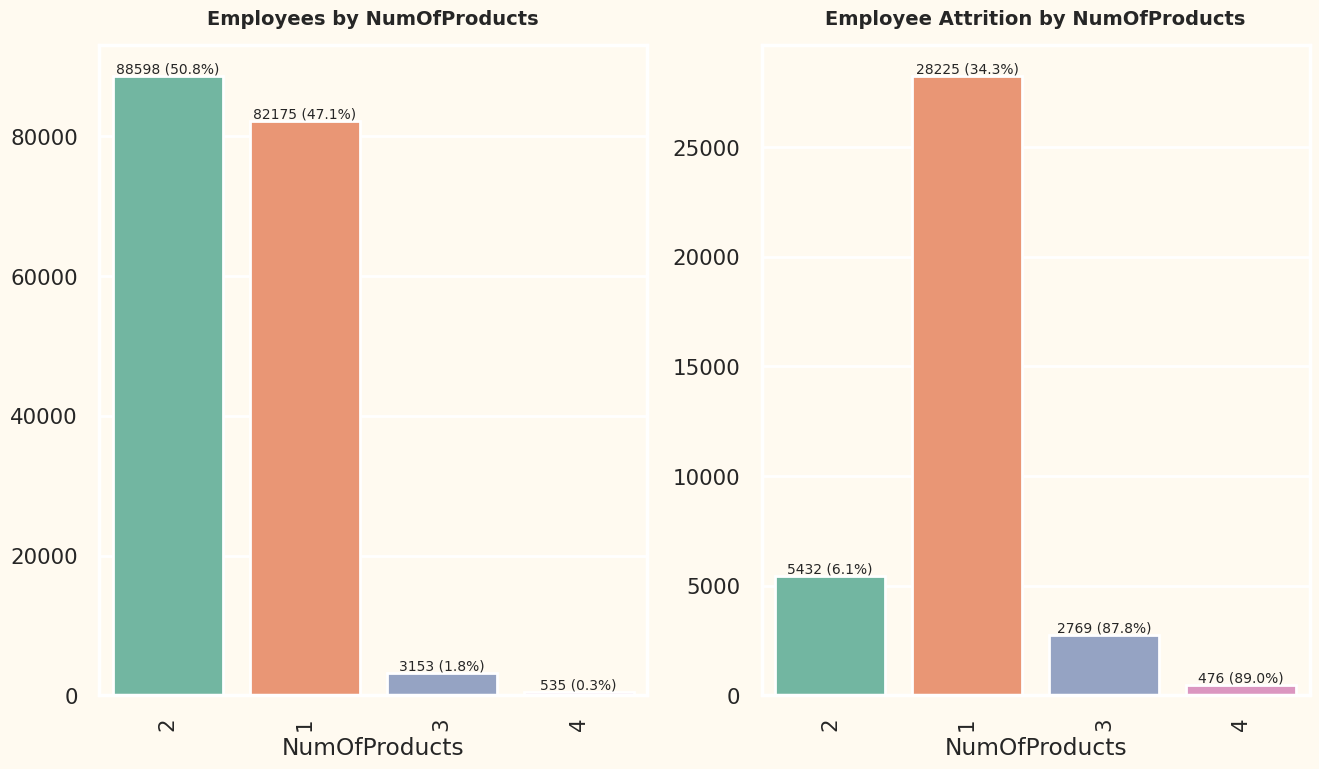

In [35]:
count_percent_plot(train_df,'NumOfProducts','Exited')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* 50.8% Customers have 2 no of products with 6.1% Attrition rate
* 47.1% Customers have 1 no of products with 34.3% Attrition rate 
* 1.8% Customers have 3 no of products with 88.8% attrition rate (High Attrition rate)
* 0.3% Customers have 4 no of products with 89% attrition rate (High Attrition rate)

#### 9. Analyzing Employee Attrition by HasCrCard

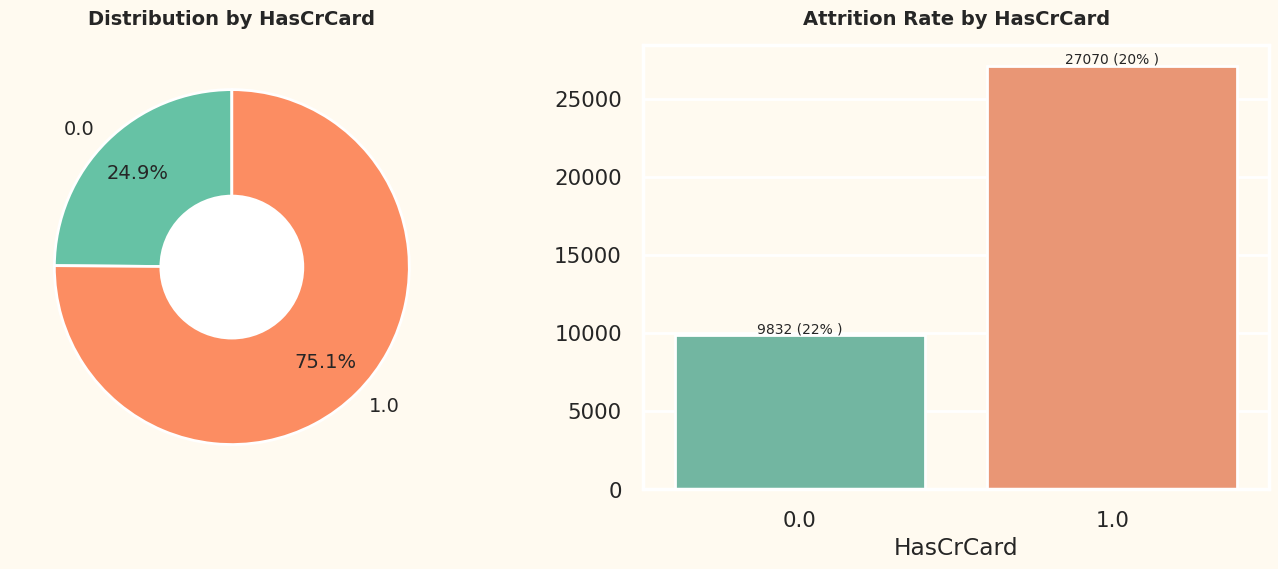

In [36]:
pie_bar_plot(train_df, 'HasCrCard', 'Exited')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* 75% of customers have Credit Card
* 25% of customers dont have credit card
* both classes have almost same rate Attrition i.e 20-22 %
* No meaningfull information for attrition is seen here

#### 10. Analyzing Employee Attrition by IsActiveMember

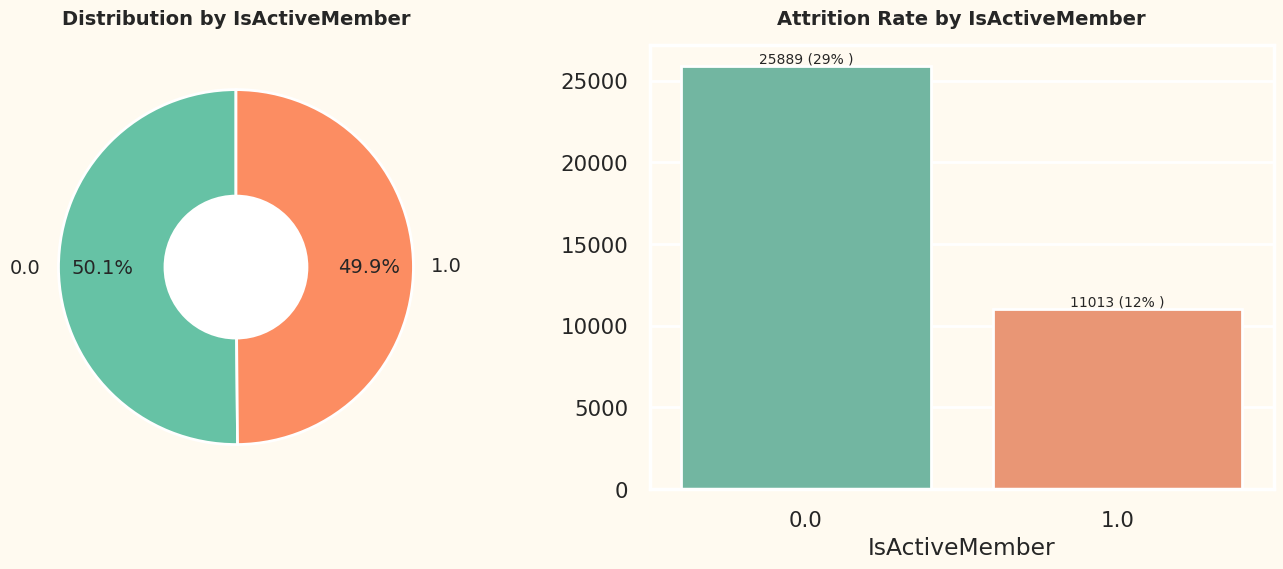

In [37]:
pie_bar_plot(train_df, 'IsActiveMember', 'Exited')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* 50.1% Customers are Not Active members with attrition rate 29%
* 49.9% are active members with attrition rate 12%
* Not Active members are most likely to be Exited

#### 11. Analyzing Employee Attrition by EstimatedSalary

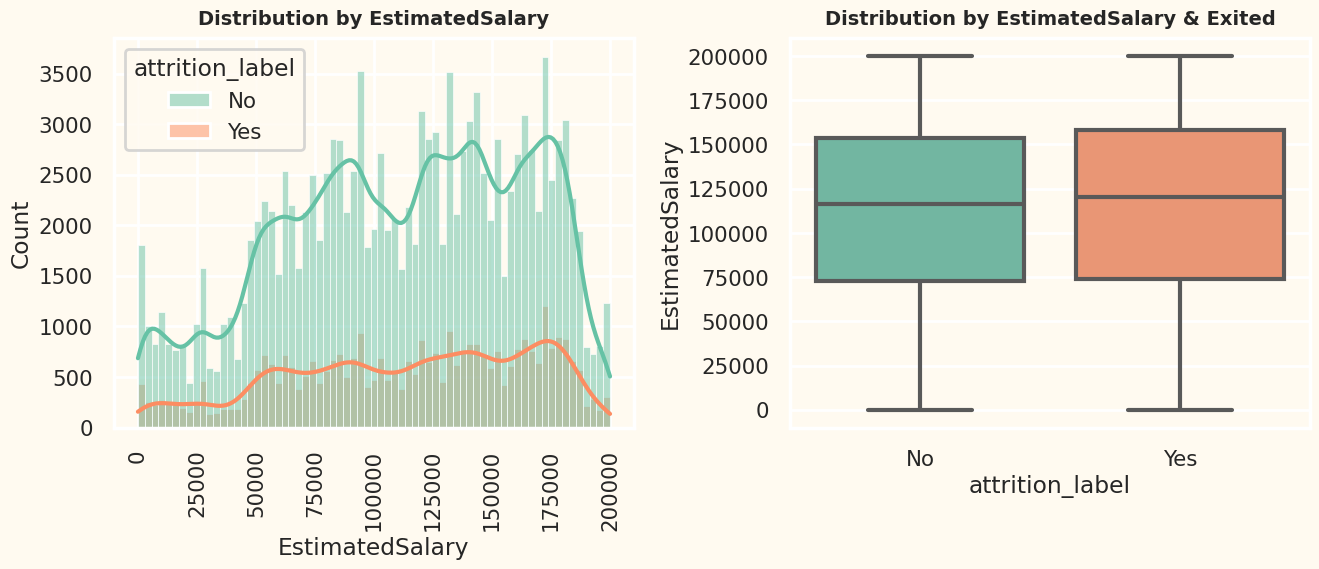

In [38]:
hist_with_hue(train_df, 'EstimatedSalary', 'Exited')

In [39]:
# droping the columns which we have created for analysis purpose
train_df.drop(['attrition_label'],axis = 1, inplace=True)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Statistical Analysis - Feature Importance </div> 

### 1. Performing ANOVA Test to Analyze the Numerical Features Importance in Employee Attrition.

In [40]:
num_cols = train_df.select_dtypes(np.number).columns

In [41]:
new_data = train_df.copy()

In [42]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_data[column],new_data["Exited"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

#### Visualizing the F_Score of ANOVA Test of Each Numerical features.

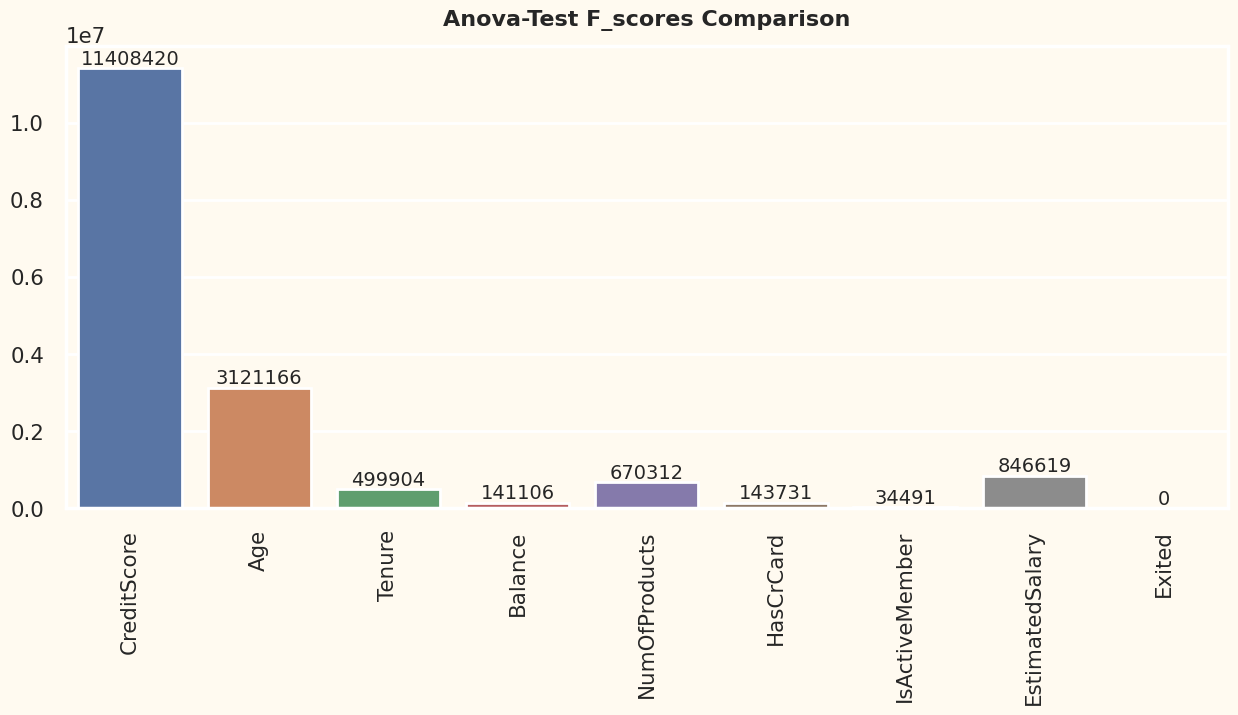

In [43]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

#### Comparing F_Score and P_value of ANOVA Test.

In [44]:
annova_data = pd.DataFrame({"Features":keys,"F_Score":values})
annova_data["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
annova_data

,Features,F_Score,P_value
0,CreditScore,1.140842e+07,0.00000000000000000000
1,Age,3.121167e+06,0.00000000000000000000
2,Tenure,4.999040e+05,0.00000000000000000000
3,Balance,1.411069e+05,0.00000000000000000000
4,NumOfProducts,6.703126e+05,0.00000000000000000000
5,HasCrCard,1.437311e+05,0.00000000000000000000
6,IsActiveMember,3.449105e+04,0.00000000000000000000
7,EstimatedSalary,8.466200e+05,0.00000000000000000000
8,Exited,-1.759877e-29,nan


### 2. Performing Chi-Square Test to Analyze the Categorical Feature Importance in Employee Attrition.

In [45]:
cat_cols = train_df.select_dtypes(include="object").columns.tolist()


In [46]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(train_df[col], train_df['Exited'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

#### Visualizing the Chi-Square Statistic Values of Each Categorical Features.

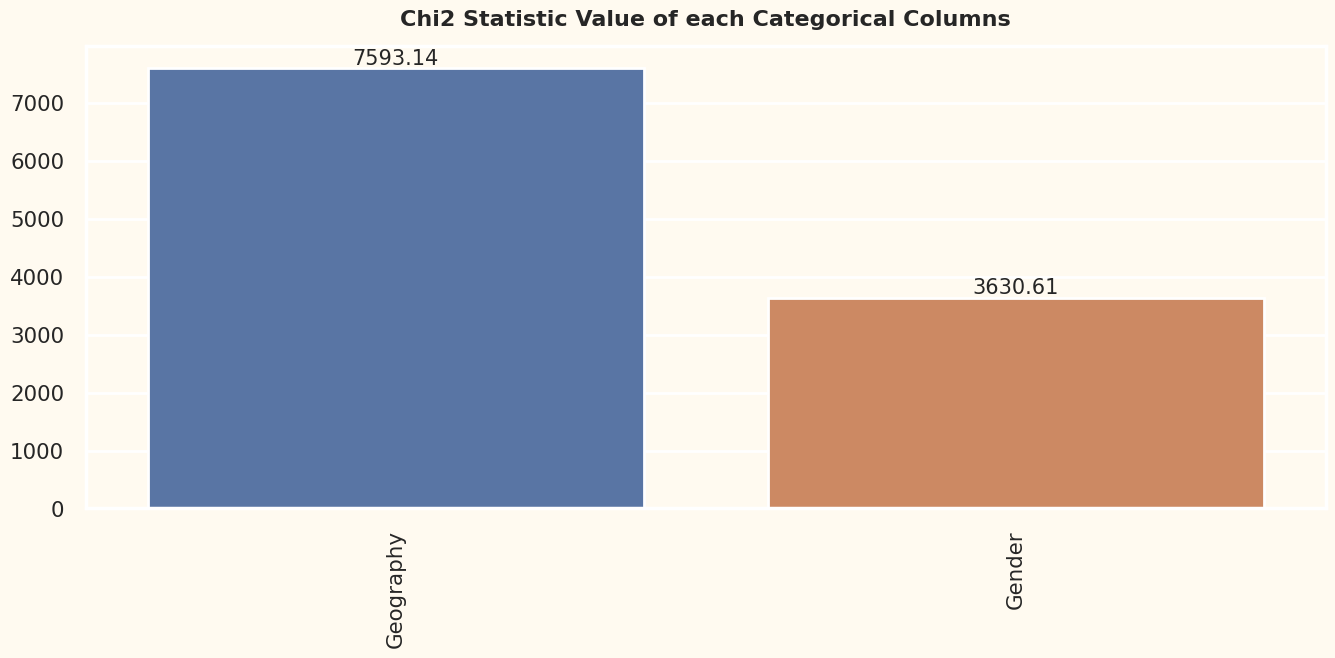

In [47]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

### Compairing Chi2_Statistic and P_value of Chi_Square Test.

In [48]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_data

,Features,Chi_2 Statistic,P_value
0,Geography,7593.142048,0.00000000000000000000
1,Gender,3630.613249,0.00000000000000000000


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Encoding </div> 

In [49]:
train_df["Gender"] = train_df["Gender"].replace({"Female":0 ,"Male":1})
test_df["Gender"] = test_df["Gender"].replace({"Female":0 ,"Male":1})

In [50]:
# Using pandas get_dummies for one-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=['Geography'], prefix='geo')
test_df_encoded = pd.get_dummies(test_df, columns=['Geography'], prefix='geo')

In [51]:
# Convert specific boolean columns to integer (1 and 0)
columns_to_convert = ['geo_France', 'geo_Germany', 'geo_Spain']
train_df_encoded[columns_to_convert] = train_df_encoded[columns_to_convert].astype(int)
test_df_encoded[columns_to_convert] = test_df_encoded[columns_to_convert].astype(int)


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Correlation Matrix </div> 

<Axes: title={'center': 'Correlation Plot'}>

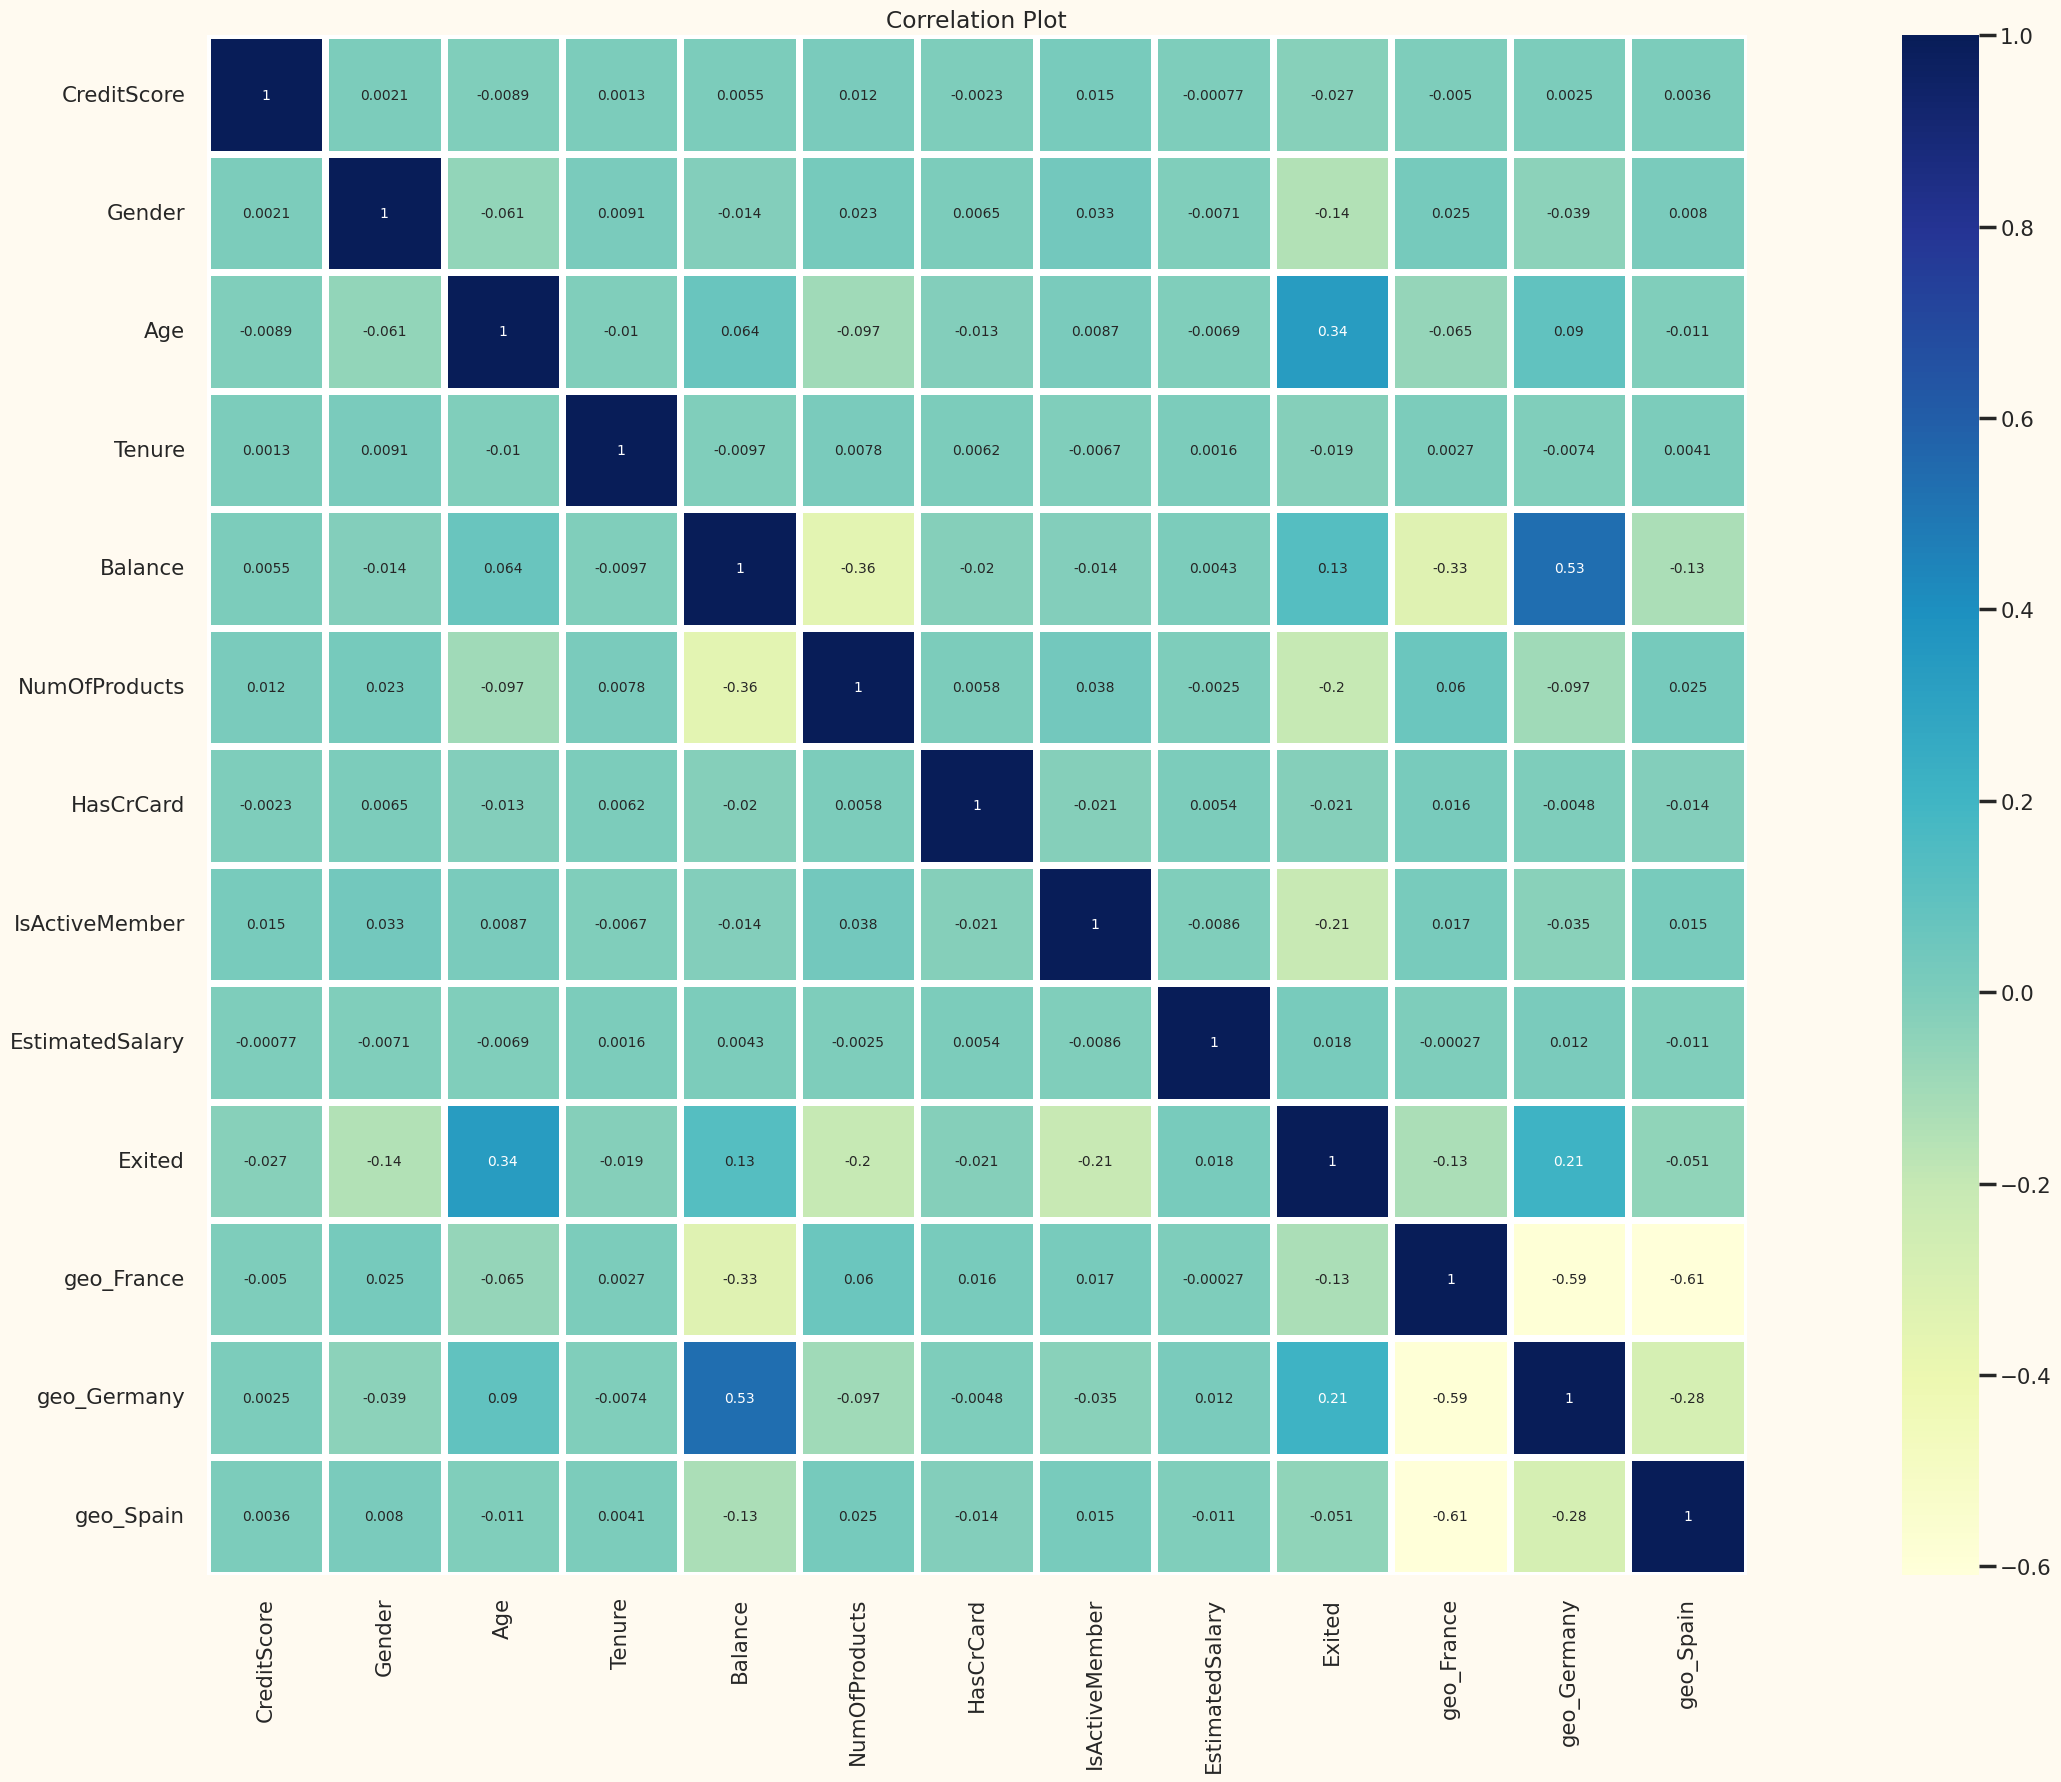

In [52]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_df_encoded.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [53]:
# Calculate the correlation matrix
correlation_matrix = train_df_encoded.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* no highly correlated features found

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Check for Imbalance in Dataset </div>

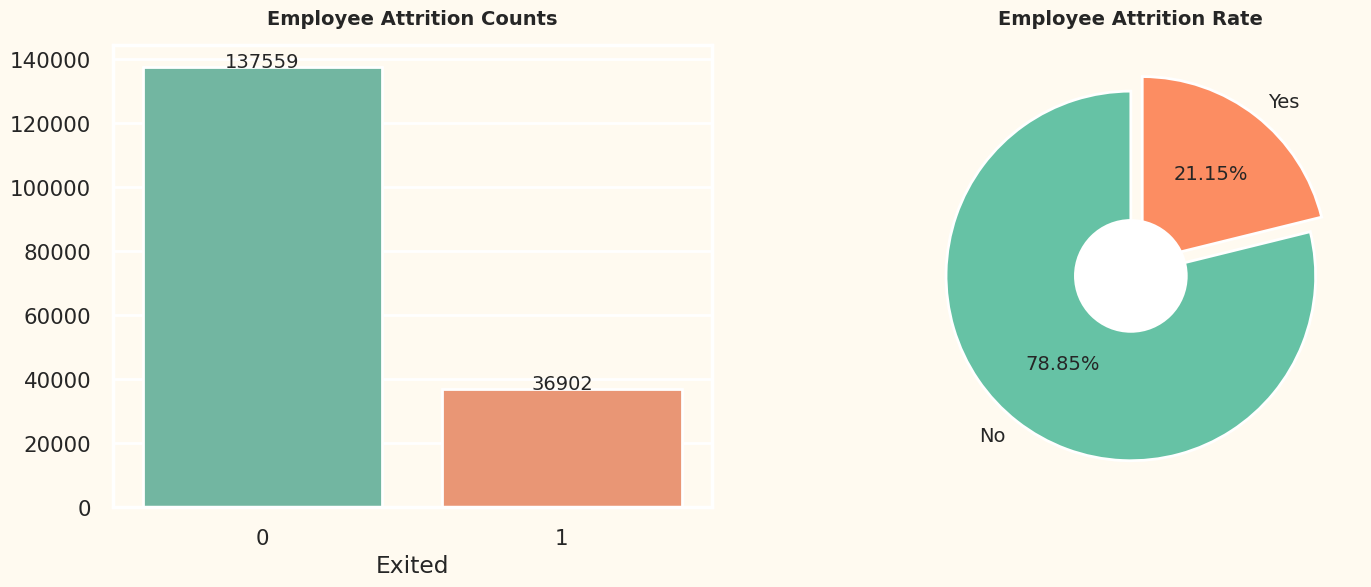

In [54]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = train_df["Exited"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Dataset is Imbalance.  
* Need to Balance the dataset 

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split the Data into Independent and Dependent Variable </div>

In [55]:
x = train_df_encoded.drop(['Exited'], axis=1)
y = train_df_encoded[['Exited']]

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Balance the Dataset using SMOTE </div>

In [56]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote Exited
0         137559
1          36902
Name: count, dtype: int64

After Smoote Exited
0         137559
1         137559
Name: count, dtype: int64


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Featutre Engineering </div> 

In [57]:
def newfeatures(df):
    df['IsSenior'] = df['Age'].apply(lambda x: 1 if x >= 60 else 0)
    df['IsActive_by_CreditCard'] = df['HasCrCard'] * df['IsActiveMember']
    df['Products_Per_Tenure'] =  df['Tenure'] / df['NumOfProducts']
    df['AgeCat'] = np.round(df.Age/20).astype('int').astype('category')
    return df

In [58]:
newfeatures(x_smote)
newfeatures(test_df_encoded)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain,IsSenior,IsActive_by_CreditCard,Products_Per_Tenure,AgeCat
0,586,0,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,0,0.0,1.0,1
1,683,0,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0,0,0.0,2.0,2
2,656,0,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,0,0.0,3.5,2
3,681,1,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,0,0.0,8.0,2
4,752,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0,0,0.0,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,1,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,1,0,1.0,7.0,1
110019,575,0,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,0,0,1.0,4.0,2
110020,712,1,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0,0,0.0,1.0,2
110021,709,0,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,0,0,1.0,3.0,2


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Feature Scaling </div>

In [59]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scaler = RobustScaler()
minmax = MinMaxScaler()

In [60]:
x_smote_scaled = x_smote
test_df_scaled = test_df_encoded

In [61]:
x_smote.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo_France,geo_Germany,geo_Spain,IsSenior,IsActive_by_CreditCard,Products_Per_Tenure,AgeCat
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,1,0,0,0,0.0,1.5,2
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,1,0,0,0,1.0,0.5,2
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,1,0,0,0,0.0,5.0,2
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,1,0,0,0,1.0,2.0,2
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,0,1.0,2.5,2


In [62]:
# Assuming x_smote is your DataFrame
columns_to_minmax_scale = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Products_Per_Tenure','AgeCat']

# Fit and transform the selected columns
x_smote_scaled[columns_to_minmax_scale] = minmax.fit_transform(x_smote_scaled[columns_to_minmax_scale])

In [63]:
columns_to_RobustScaler = ['Balance','EstimatedSalary']
x_smote_scaled[columns_to_RobustScaler] = scaler.fit_transform(x_smote_scaled[columns_to_RobustScaler])

In [64]:
test_df_scaled[columns_to_minmax_scale] = minmax.transform(test_df_scaled[columns_to_minmax_scale])
test_df_scaled[columns_to_RobustScaler] = scaler.transform(test_df_scaled[columns_to_RobustScaler])

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> PCA Implementation </div>

In [65]:
from sklearn.decomposition import PCA


In [66]:
x_smote_scaled.shape

(275118, 16)

In [67]:
test_df_scaled.shape

(110023, 16)

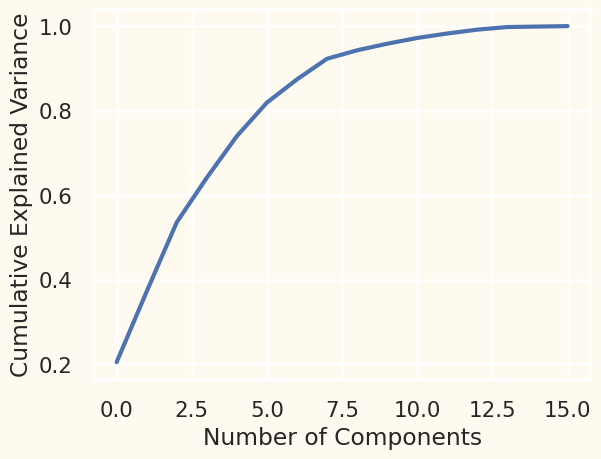

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(x_smote_scaled)  # X_train is your training data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [69]:
## PCA- Transformation
pca=PCA(n_components=14)
pca

PCA(n_components=14)

In [70]:
#Scaled Data
x_smote_scaled=pca.fit_transform(x_smote_scaled)
test_df_scaled = pca.transform(test_df_scaled)

In [71]:
# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier,Pool
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import os
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold, cross_val_predict
#from scikeras.wrappers import KerasClassifier


#for hypertuning
import optuna
from collections import Counter
from catboost import CatBoostError
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score # for Gini-mean
from sklearn.metrics import roc_curve


## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Baseline Model Building </div>

In [72]:
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Model Building for Scaled Data</div>

In [73]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict

def model_prediction(model, x, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(x_train, y_train)
        x_train_pred = model.predict(x_train)
        x_test_pred = model.predict(x_test)
        y_test_prob = model.predict_proba(x_test)[:, 1]

        a = accuracy_score(y_train, x_train_pred) * 100
        b = accuracy_score(y_test, x_test_pred) * 100
        c = precision_score(y_test, x_test_pred)
        d = recall_score(y_test, x_test_pred)
        e = roc_auc_score(y_test, y_test_prob)
        f = f1_score(y_test, x_test_pred)

        training_score.append(a)
        testing_score.append(b)
        precission.append(c)
        recall.append(d)
        Roc_Auc_score.append(e)
        f1_score_.append(f)

    print("\n------------------------------------------------------------------------")
    print(f"Mean Accuracy_Score of {model} model on Training Data is:", np.mean(training_score))
    print(f"Mean Accuracy_Score of {model} model on Testing Data is:", np.mean(testing_score))
    print(f"Mean Precision Score of {model} model is:", np.mean(precission))
    print(f"Mean Recall Score of {model} model is:", np.mean(recall))
    print(f"Mean ROC_AUC Score of {model} model is:", np.mean(Roc_Auc_score))
    print(f"Mean f1 Score of {model} model is:", np.mean(f1_score_))

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    y_pred_all = cross_val_predict(model, x, y, cv=skf)
    print(classification_report(y, y_pred_all))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y, y_pred_all)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
    plt.show()

In [74]:
y_smote_array = np.array(y_smote)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Logistic Regression Model </div>


------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 83.77687034511567
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 83.77823410223488
Mean Precision Score of LogisticRegression() model is: 0.8545512969535572
Mean Recall Score of LogisticRegression() model is: 0.81413795448275
Mean ROC_AUC Score of LogisticRegression() model is: 0.9097013399313403
Mean f1 Score of LogisticRegression() model is: 0.8338536327269328

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84    137559
           1       0.85      0.81      0.83    137559

    accuracy                           0.84    275118
   macro avg       0.84      0.84      0.84    275118
weighted avg       0.84      0.84      0.84    275118


---------

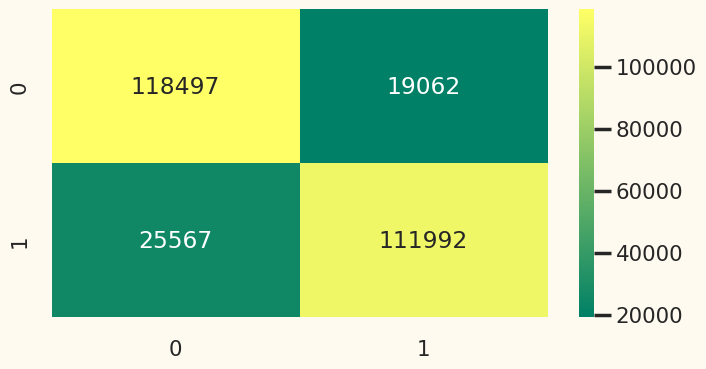

In [75]:
model_prediction(LogisticRegression(), x_smote_scaled, y_smote_array, n_splits=5, random_state=42)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> K Nearest Neighbor (KNN) </div>


------------------------------------------------------------------------
Mean Accuracy_Score of KNeighborsClassifier() model on Training Data is: 87.11407470877938
Mean Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 85.20325860307844
Mean Precision Score of KNeighborsClassifier() model is: 0.8693160693434884
Mean Recall Score of KNeighborsClassifier() model is: 0.8286262730626378
Mean ROC_AUC Score of KNeighborsClassifier() model is: 0.9187003179412054
Mean f1 Score of KNeighborsClassifier() model is: 0.8484822355073647

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87    137559
           1       0.88      0.84      0.86    137559

    accuracy                           0.87    275118
   macro avg       0.87      0.87      0.87    275118
weighted avg       0.87      0.87      0.87    27

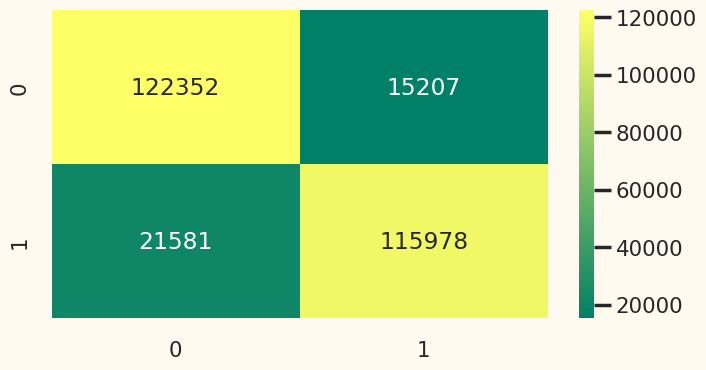

In [76]:
model_prediction(KNeighborsClassifier(), x_smote_scaled, y_smote_array, n_splits=5, random_state=42)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Naive Bayes </div>


------------------------------------------------------------------------
Mean Accuracy_Score of GaussianNB() model on Training Data is: 85.43855123443686
Mean Accuracy_Score of GaussianNB() model on Testing Data is: 84.16521897402247
Mean Precision Score of GaussianNB() model is: 0.865764805702813
Mean Recall Score of GaussianNB() model is: 0.8084967225583441
Mean ROC_AUC Score of GaussianNB() model is: 0.9070213904210003
Mean f1 Score of GaussianNB() model is: 0.8359669008949503

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83    137559
           1       0.86      0.77      0.81    137559

    accuracy                           0.82    275118
   macro avg       0.82      0.82      0.82    275118
weighted avg       0.82      0.82      0.82    275118


----------------------------------------------------------------

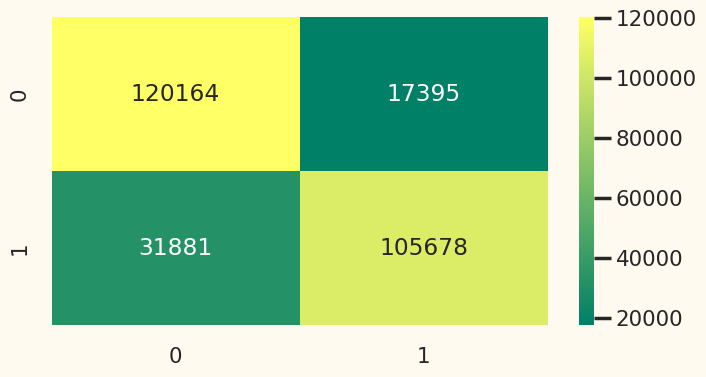

In [77]:
model_prediction(GaussianNB(), x_smote_scaled, y_smote_array, n_splits=5, random_state=42)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Model Building for Unscaled Data </div>

In [78]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def model_prediction(model, x, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        x_train_pred = model.predict(x_train)
        x_test_pred = model.predict(x_test)
        y_test_prob = model.predict_proba(x_test)[:, 1]

        a = accuracy_score(y_train, x_train_pred) * 100
        b = accuracy_score(y_test, x_test_pred) * 100
        c = precision_score(y_test, x_test_pred)
        d = recall_score(y_test, x_test_pred)
        e = roc_auc_score(y_test, y_test_prob)
        f = f1_score(y_test, x_test_pred)

        training_score.append(a)
        testing_score.append(b)
        precission.append(c)
        recall.append(d)
        Roc_Auc_score.append(e)
        f1_score_.append(f)

    print("\n------------------------------------------------------------------------")
    print(f"Mean Accuracy_Score of {model} model on Training Data is:", np.mean(training_score))
    print(f"Mean Accuracy_Score of {model} model on Testing Data is:", np.mean(testing_score))
    print(f"Mean Precision Score of {model} model is:", np.mean(precission))
    print(f"Mean Recall Score of {model} model is:", np.mean(recall))
    print(f"Mean ROC_AUC Score of {model} model is:", np.mean(Roc_Auc_score))
    print(f"Mean f1 Score of {model} model is:", np.mean(f1_score_))

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    y_pred_all = cross_val_predict(model, x, y, cv=skf)
    print(classification_report(y, y_pred_all))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y, y_pred_all)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
    plt.show()

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Decision Tree </div>


------------------------------------------------------------------------
Mean Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 89.02639050851216
Mean Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 84.66258139779892
Mean Precision Score of DecisionTreeClassifier() model is: 0.8640728742179297
Mean Recall Score of DecisionTreeClassifier() model is: 0.8226470149733863
Mean ROC_AUC Score of DecisionTreeClassifier() model is: 0.895818412182391
Mean f1 Score of DecisionTreeClassifier() model is: 0.8424843073436499

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86    137559
           1       0.86      0.86      0.86    137559

    accuracy                           0.86    275118
   macro avg       0.86      0.86      0.86    275118
weighted avg       0.86      0.86   

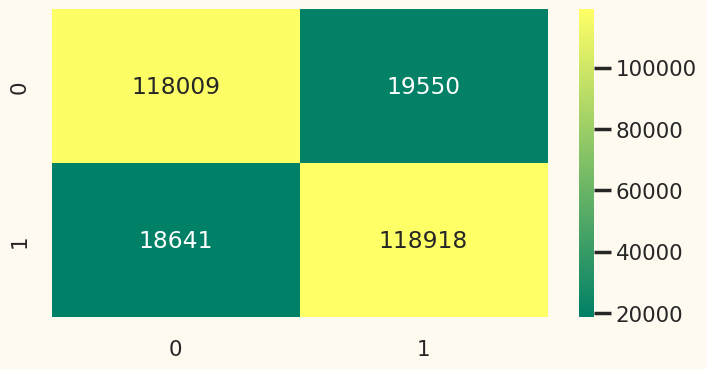

In [79]:
model_prediction(DecisionTreeClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Random Forest </div>


------------------------------------------------------------------------
Mean Accuracy_Score of RandomForestClassifier() model on Training Data is: 91.17882146265923
Mean Accuracy_Score of RandomForestClassifier() model on Testing Data is: 85.70518860502212
Mean Precision Score of RandomForestClassifier() model is: 0.8748107783229342
Mean Recall Score of RandomForestClassifier() model is: 0.8333195251334558
Mean ROC_AUC Score of RandomForestClassifier() model is: 0.9086596317835965
Mean f1 Score of RandomForestClassifier() model is: 0.8532673937594165

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90    137559
           1       0.92      0.88      0.90    137559

    accuracy                           0.90    275118
   macro avg       0.90      0.90      0.90    275118
weighted avg       0.90      0.90  

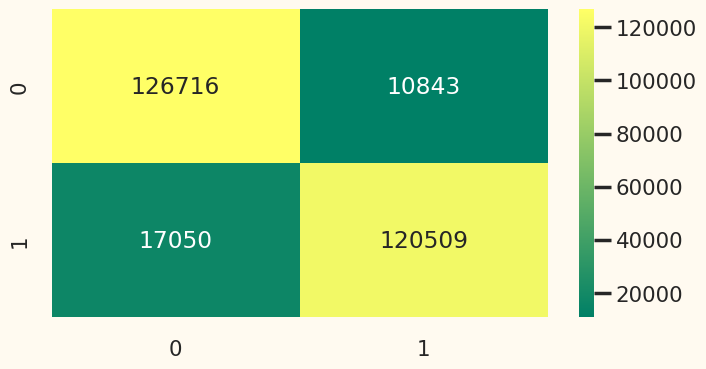

In [80]:
model_prediction(RandomForestClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Ada Boost </div>


------------------------------------------------------------------------
Mean Accuracy_Score of AdaBoostClassifier() model on Training Data is: 90.79579793089994
Mean Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 86.2336042530214
Mean Precision Score of AdaBoostClassifier() model is: 0.8793610673342382
Mean Recall Score of AdaBoostClassifier() model is: 0.8397960165286676
Mean ROC_AUC Score of AdaBoostClassifier() model is: 0.9162526561632706
Mean f1 Score of AdaBoostClassifier() model is: 0.8588700549211806

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier() model is:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89    137559
           1       0.90      0.87      0.89    137559

    accuracy                           0.89    275118
   macro avg       0.89      0.89      0.89    275118
weighted avg       0.89      0.89      0.89    275118


--------

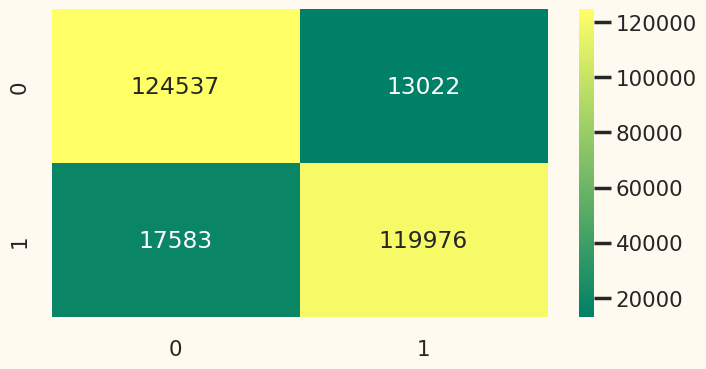

In [81]:
model_prediction(AdaBoostClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Gradient Boosting </div>


------------------------------------------------------------------------
Mean Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 90.61713001257893
Mean Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 86.7013429480692
Mean Precision Score of GradientBoostingClassifier() model is: 0.8841644233554
Mean Recall Score of GradientBoostingClassifier() model is: 0.8445965539646009
Mean ROC_AUC Score of GradientBoostingClassifier() model is: 0.9224901477325007
Mean f1 Score of GradientBoostingClassifier() model is: 0.8637104722607697

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90    137559
           1       0.91      0.87      0.89    137559

    accuracy                           0.90    275118
   macro avg       0.90      0.90      0.90    275118
weighted av

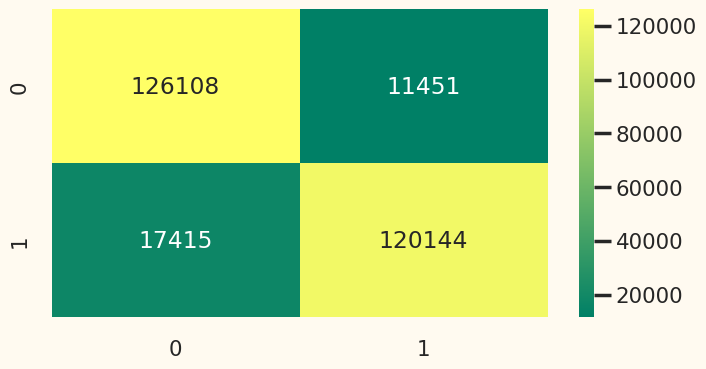

In [82]:
model_prediction(GradientBoostingClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> XG Boost </div>


------------------------------------------------------------------------
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 90.72643376362717
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              co

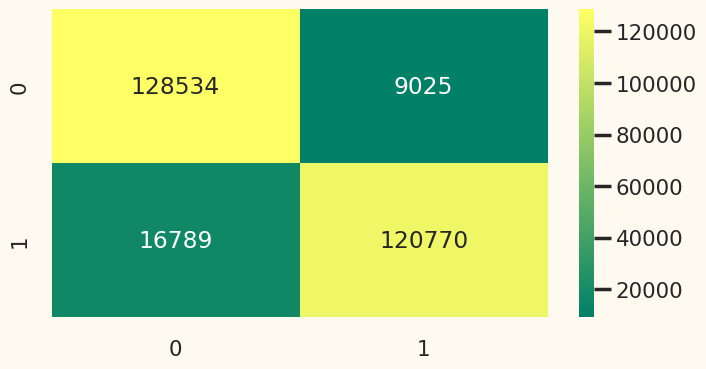

In [83]:
model_prediction(XGBClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> CatBoost  </div>

Learning rate set to 0.103093
0:	learn: 0.5799790	total: 106ms	remaining: 1m 45s
1:	learn: 0.5088200	total: 153ms	remaining: 1m 16s
2:	learn: 0.4616480	total: 200ms	remaining: 1m 6s
3:	learn: 0.4255110	total: 242ms	remaining: 1m
4:	learn: 0.3974541	total: 283ms	remaining: 56.3s
5:	learn: 0.3748558	total: 323ms	remaining: 53.6s
6:	learn: 0.3476775	total: 364ms	remaining: 51.6s
7:	learn: 0.3357916	total: 413ms	remaining: 51.3s
8:	learn: 0.3266013	total: 452ms	remaining: 49.8s
9:	learn: 0.3198363	total: 491ms	remaining: 48.6s
10:	learn: 0.3068306	total: 532ms	remaining: 47.9s
11:	learn: 0.3021435	total: 571ms	remaining: 47s
12:	learn: 0.2908524	total: 611ms	remaining: 46.4s
13:	learn: 0.2865681	total: 654ms	remaining: 46s
14:	learn: 0.2838025	total: 690ms	remaining: 45.3s
15:	learn: 0.2806891	total: 728ms	remaining: 44.8s
16:	learn: 0.2781377	total: 766ms	remaining: 44.3s
17:	learn: 0.2721895	total: 803ms	remaining: 43.8s
18:	learn: 0.2706852	total: 842ms	remaining: 43.5s
19:	learn: 0.269

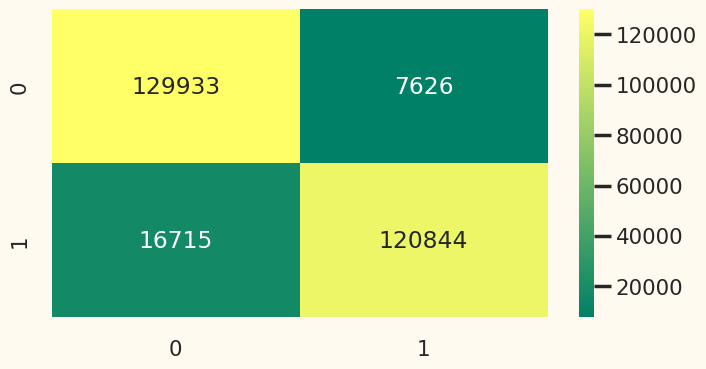

In [84]:
model_prediction(CatBoostClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> LgbmClassifier  </div>


------------------------------------------------------------------------
Mean Accuracy_Score of LGBMClassifier() model on Training Data is: 90.8657194629722
Mean Accuracy_Score of LGBMClassifier() model on Testing Data is: 87.93303261938674
Mean Precision Score of LGBMClassifier() model is: 0.8991517765297439
Mean Recall Score of LGBMClassifier() model is: 0.8546441880304634
Mean ROC_AUC Score of LGBMClassifier() model is: 0.9358628842288824
Mean f1 Score of LGBMClassifier() model is: 0.8761674341562764

------------------------------------------------------------------------
Classification Report of LGBMClassifier() model is:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91    137559
           1       0.93      0.88      0.90    137559

    accuracy                           0.91    275118
   macro avg       0.91      0.91      0.91    275118
weighted avg       0.91      0.91      0.91    275118


------------------------------------

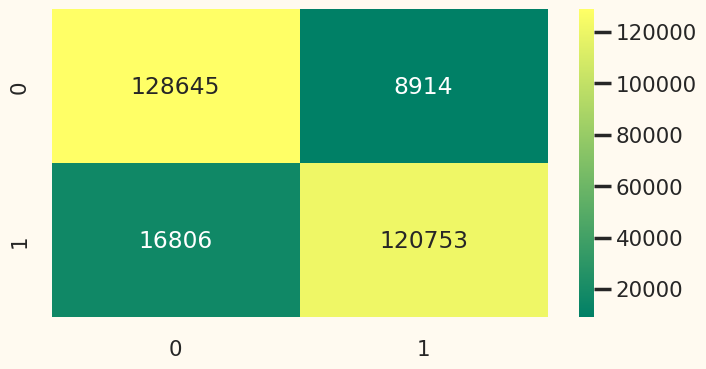

In [85]:
model_prediction(LGBMClassifier(), x_smote, y_smote, n_splits=5, random_state=42)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Hypertuning  Selected Models </div>

# Catboost

In [86]:
num_folds = 5  # Set the number of folds
RAND_VAL = 42  # Set the random state
n_est = 4000  # Set the number of iterations

folds = StratifiedKFold(n_splits=num_folds, random_state=RAND_VAL, shuffle=True)
test_preds = np.empty((num_folds, len(test_df_encoded)))
auc_vals = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(x_smote, y_smote)):
    
    X_train, y_train = x_smote.iloc[train_idx], y_smote.iloc[train_idx]
    X_val, y_val = x_smote.iloc[valid_idx], y_smote.iloc[valid_idx]
    
    train_pool = Pool(X_train, y_train)
    val_pool = Pool(X_val, y_val)
    
    clf = CatBoostClassifier(
        eval_metric='AUC',
        learning_rate=0.022,
        iterations=n_est
    )
    clf.fit(train_pool, eval_set=val_pool, verbose=300)
    
    y_pred_val = clf.predict_proba(X_val)[:, 1]
    auc_val = roc_auc_score(y_val, y_pred_val)
    print("AUC for fold ", n_fold, ": ", auc_val)
    auc_vals.append(auc_val)
    
    y_pred_test = clf.predict_proba(test_df_encoded)[:, 1]
    test_preds[n_fold, :] = y_pred_test
    print("----------------")


0:	test: 0.9243546	best: 0.9243546 (0)	total: 51.8ms	remaining: 3m 27s
300:	test: 0.9629355	best: 0.9629355 (300)	total: 13.8s	remaining: 2m 49s
600:	test: 0.9653193	best: 0.9653193 (600)	total: 26.9s	remaining: 2m 32s
900:	test: 0.9669135	best: 0.9669135 (900)	total: 40.5s	remaining: 2m 19s
1200:	test: 0.9675505	best: 0.9675509 (1197)	total: 53.4s	remaining: 2m 4s
1500:	test: 0.9678832	best: 0.9678832 (1500)	total: 1m 6s	remaining: 1m 50s
1800:	test: 0.9681129	best: 0.9681130 (1798)	total: 1m 19s	remaining: 1m 37s
2100:	test: 0.9682860	best: 0.9682860 (2100)	total: 1m 32s	remaining: 1m 23s
2400:	test: 0.9683675	best: 0.9683675 (2400)	total: 1m 46s	remaining: 1m 10s
2700:	test: 0.9684174	best: 0.9684174 (2700)	total: 1m 58s	remaining: 57.2s
3000:	test: 0.9684597	best: 0.9684606 (2981)	total: 2m 12s	remaining: 44s
3300:	test: 0.9685101	best: 0.9685101 (3298)	total: 2m 25s	remaining: 30.8s
3600:	test: 0.9685473	best: 0.9685480 (3597)	total: 2m 38s	remaining: 17.5s
3900:	test: 0.9685802	b

In [87]:
catboost_preds = test_preds.mean(axis=0)
print("Mean AUC: ",np.mean(auc_vals))


Mean AUC:  0.9686025762689878


# XGBoost

In [88]:
num_folds = 5  # Set the number of folds
RAND_VAL = 42  # Set the random state
n_est = 4000  # Set the number of iterations

folds = StratifiedKFold(n_splits=num_folds, random_state=RAND_VAL, shuffle=True)
test_preds = np.empty((num_folds, len(test_df_encoded)))
auc_vals = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(x_smote, y_smote)):
    
    X_train, y_train = x_smote.iloc[train_idx], y_smote.iloc[train_idx]
    X_val, y_val = x_smote.iloc[valid_idx], y_smote.iloc[valid_idx]
    
    clf = XGBClassifier(
        learning_rate=0.022,
        n_estimators=n_est,
        eval_metric='auc'  # Specify eval_metric here
    )
    
    clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=300, early_stopping_rounds=50)
    
    y_pred_val = clf.predict_proba(X_val)[:, 1]
    auc_val = roc_auc_score(y_val, y_pred_val)
    print("AUC for fold ", n_fold, ": ", auc_val)
    auc_vals.append(auc_val)
    
    # Assuming test_df_encoded is your test data for prediction
    y_pred_test = clf.predict_proba(test_df_encoded)[:, 1]
    test_preds[n_fold, :] = y_pred_test
    print("----------------")


[0]	validation_0-auc:0.93358
[300]	validation_0-auc:0.96250
[600]	validation_0-auc:0.96526
[900]	validation_0-auc:0.96620
[1200]	validation_0-auc:0.96655
[1500]	validation_0-auc:0.96673
[1800]	validation_0-auc:0.96681
[2002]	validation_0-auc:0.96685
AUC for fold  0 :  0.9668514853461918
----------------
[0]	validation_0-auc:0.93019
[300]	validation_0-auc:0.96207
[600]	validation_0-auc:0.96482
[900]	validation_0-auc:0.96565
[1200]	validation_0-auc:0.96606
[1500]	validation_0-auc:0.96625
[1800]	validation_0-auc:0.96636
AUC for fold  1 :  0.9663667640052134
----------------
[0]	validation_0-auc:0.93194
[300]	validation_0-auc:0.96155
[600]	validation_0-auc:0.96458
[900]	validation_0-auc:0.96553
[1200]	validation_0-auc:0.96594
[1500]	validation_0-auc:0.96610
[1800]	validation_0-auc:0.96618
[1930]	validation_0-auc:0.96618
AUC for fold  2 :  0.9661864909555237
----------------
[0]	validation_0-auc:0.93287
[300]	validation_0-auc:0.96256
[600]	validation_0-auc:0.96520
[900]	validation_0-auc:0.9

In [89]:
xgboost_preds = test_preds.mean(axis=0)
"Mean AUC: ",np.mean(auc_vals)

('Mean AUC: ', 0.9667733566323358)

# LGBM

In [90]:
num_folds = 5  # Set the number of folds
RAND_VAL = 42  # Set the random state
n_est = 4000  # Set the number of iterations

folds = StratifiedKFold(n_splits=num_folds, random_state=RAND_VAL, shuffle=True)
test_preds = np.empty((num_folds, len(test_df_encoded)))
auc_vals = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(x_smote, y_smote)):
    
    X_train, y_train = x_smote.iloc[train_idx], y_smote.iloc[train_idx]
    X_val, y_val = x_smote.iloc[valid_idx], y_smote.iloc[valid_idx]
    
    clf = LGBMClassifier(
        learning_rate=0.022,
        n_estimators=n_est
    )
    
    clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=300, early_stopping_rounds=50)
    
    y_pred_val = clf.predict_proba(X_val)[:, 1]
    auc_val = roc_auc_score(y_val, y_pred_val)
    print("AUC for fold ", n_fold, ": ", auc_val)
    auc_vals.append(auc_val)
    
    # Assuming test_df_encoded is your test data for prediction
    y_pred_test = clf.predict_proba(test_df_encoded)[:, 1]
    test_preds[n_fold, :] = y_pred_test
    print("----------------")


[300]	valid_0's binary_logloss: 0.234786
[600]	valid_0's binary_logloss: 0.221399
[900]	valid_0's binary_logloss: 0.218705
[1200]	valid_0's binary_logloss: 0.217007
[1500]	valid_0's binary_logloss: 0.216317
[1800]	valid_0's binary_logloss: 0.21576
[2100]	valid_0's binary_logloss: 0.21515
[2400]	valid_0's binary_logloss: 0.214811
[2700]	valid_0's binary_logloss: 0.214468
AUC for fold  0 :  0.9682992701442775
----------------
[300]	valid_0's binary_logloss: 0.235432
[600]	valid_0's binary_logloss: 0.222666
[900]	valid_0's binary_logloss: 0.219519
[1200]	valid_0's binary_logloss: 0.218304
[1500]	valid_0's binary_logloss: 0.21741
[1800]	valid_0's binary_logloss: 0.216809
[2100]	valid_0's binary_logloss: 0.216316
AUC for fold  1 :  0.96778058638358
----------------
[300]	valid_0's binary_logloss: 0.235298
[600]	valid_0's binary_logloss: 0.222228
[900]	valid_0's binary_logloss: 0.219314
[1200]	valid_0's binary_logloss: 0.217815
[1500]	valid_0's binary_logloss: 0.217132
[1800]	valid_0's binar

In [91]:
lgbm_preds = test_preds.mean(axis=0)
"Mean AUC: ",np.mean(auc_vals)

('Mean AUC: ', 0.9682934539384421)

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Ensemble Using Average</div>

In [92]:
# Ensemble by averaging predictions
ensemble_preds = (catboost_preds + xgboost_preds + lgbm_preds) / 3


In [93]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [94]:
# Create a submission DataFrame
submission = pd.DataFrame({'id': test_df['id'], 'Exited': ensemble_preds})


In [95]:
# Save the submission file
submission.to_csv('submission.csv', index=False)
submission

,id,Exited
0,165034,0.050836
1,165035,0.874060
2,165036,0.029950
3,165037,0.227756
4,165038,0.342744
...,...,...
110018,275052,0.046218
110019,275053,0.262407
110020,275054,0.019886
110021,275055,0.163987
